In [13]:
import numpy as np
import lightkurve as lk
import matplotlib.pyplot as plt
import astropy.timeseries as ts

In [92]:
# lc = lk.search_lightcurve('KIC 1570915', quarter=9).download().normalize().remove_outliers() - 1 # 2 sine
# lc = lk.search_lightcurve('KIC 1026146', quarter=9).download().normalize().remove_outliers() - 1 # 1 sine
lc = lk.search_lightcurve('KIC 1164102', quarter=9).download().normalize().remove_outliers() - 1 # 

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

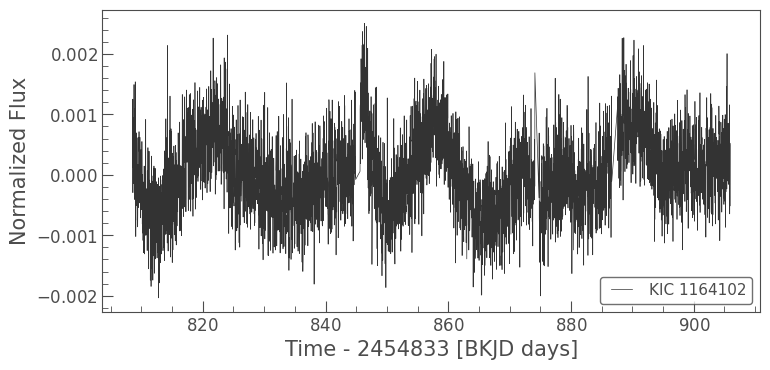

In [93]:
lc.plot()

In [114]:
ls = ts.LombScargle(lc.time, lc.flux)
freq, power = ls.autopower(nyquist_factor=1, samples_per_peak=30)

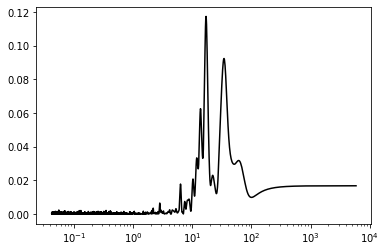

In [115]:
plt.plot(1/freq, power, 'k-')
plt.xscale('log')

In [96]:
foldper = 1/freq[np.argmax(power)].value
folded = lc.fold(foldper)

In [97]:
foldper

17.08615713968915

In [98]:
# phase = np.linspace(min(folded.time.value), max(folded.time.value), 250)
one_sine = ts.LombScargle(folded.time.value, folded.flux.value).model(folded.time.value, 1/foldper)

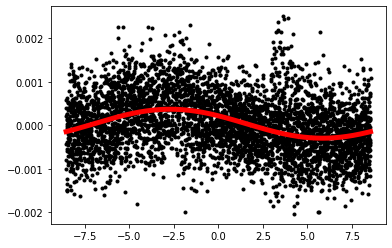

In [99]:
plt.plot(folded.time.value, folded.flux.value, 'k.')
plt.plot(folded.time.value, one_sine, 'r-', lw=5)

In [100]:
freq2, power2 = ts.LombScargle(lc.time, lc.flux, nterms=2).autopower(nyquist_factor=1)

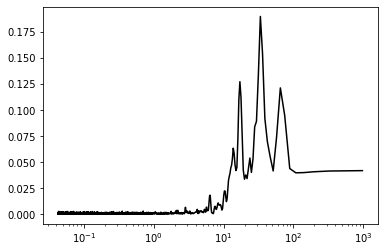

In [101]:
plt.plot(1/freq2, power2, 'k-')
plt.xscale('log')

In [102]:
foldper2 = 1/freq2[np.argmax(power2)].value
folded2 = lc.fold(foldper2)

In [103]:
foldper2

33.583136446975224

In [104]:
two_sine = ts.LombScargle(folded2.time.value, folded2.flux.value, nterms=2).model(folded2.time.value, 1/foldper2)

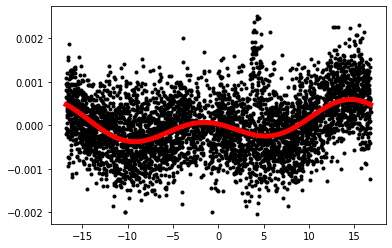

In [105]:
plt.plot(folded2.time.value, folded2.flux.value, 'k.')
plt.plot(folded2.time.value, two_sine, 'r-', lw=5)